In [1]:

import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from glob import glob
import re

In [2]:
def vector_dist(v1, v2): # euclidean distance between 2 points
    return math.sqrt(np.sum([(v1[i] - v2[i])**2 for i in range(len(v1))]))

true_diag = [14, 13]
true_antidiag = [8, 7]


In [3]:

def parser_arr(filename):
    # returns array of all traansitions and list of all class and transition thresholds
    transitions = []
    thresholds = []
    with open(filename) as textfile:
        line = textfile.readline()
        #print('opened', line)
        while line:
            if 'T threshold'in line:
                thresh_set = []
                for word in line.split():
                    try:
                        thresh_set.append(float(word))
                    except ValueError:
                        pass
                    
                line = textfile.readline()
                #print('after t', line)
                if 'C threshold' in line:
                    for word in line.split():
                        try:
                            thresh_set.append(float(word))
                        except ValueError:
                            pass
                    thresholds.append(thresh_set)
                    #print(thresholds[-1])
                else:
                    print("missing C thresh")
                    
                line = textfile.readline()
                #print('array lives here', line)
                if '[[' in line:
                    arr = np.zeros((2, 2))
                    #print(arr)
                    linenums = [int(s) for s in  re.findall(r'\d+',line)]
                    #print(linenums)
                    arr[0,:] = linenums
                    
                    line = textfile.readline()
                    #print('array lives here', line)   
                    
                    linenums = [int(s) for s in  re.findall(r'\d+',line)]
                    #print(linenums)
                    arr[1,:] = linenums
                    transitions.append(arr)
                    #print(arr)
                else:
                    print("missing array")
                    
            line = textfile.readline()
            #print(line, 'moved on')
                    
                
            
    textfile.close()
    #print(transitions, thresholds)
    return([transitions, np.array(thresholds)])        


In [4]:
print(parser_arr(glob('./output 2n4ptserr.txt')[0]))

[[array([[98.,  8.],
       [ 7., 77.]]), array([[83.,  7.],
       [ 6., 50.]]), array([[79.,  7.],
       [ 6., 46.]]), array([[70.,  7.],
       [ 6., 41.]]), array([[64.,  7.],
       [ 6., 40.]]), array([[63.,  7.],
       [ 6., 41.]]), array([[56.,  7.],
       [ 6., 36.]]), array([[52.,  7.],
       [ 6., 34.]]), array([[51.,  4.],
       [ 3., 32.]]), array([[49.,  4.],
       [ 3., 28.]]), array([[47.,  4.],
       [ 3., 26.]]), array([[44.,  4.],
       [ 3., 24.]]), array([[41.,  4.],
       [ 3., 23.]]), array([[41.,  4.],
       [ 3., 21.]]), array([[36.,  4.],
       [ 3., 18.]]), array([[36.,  4.],
       [ 3., 13.]]), array([[33.,  4.],
       [ 3., 12.]]), array([[31.,  4.],
       [ 3., 12.]]), array([[29.,  4.],
       [ 3., 12.]]), array([[26.,  4.],
       [ 3., 11.]]), array([[42.,  8.],
       [ 7., 32.]]), array([[34.,  7.],
       [ 6., 26.]]), array([[39.,  7.],
       [ 6., 27.]]), array([[36.,  7.],
       [ 6., 24.]]), array([[34.,  7.],
       [ 6., 26.]])

range diag dists:  0.0 0.9658077637337258
range antidiag diss:  0.0 0.7542472332656508


Text(0, 0.5, 'C_thresh')

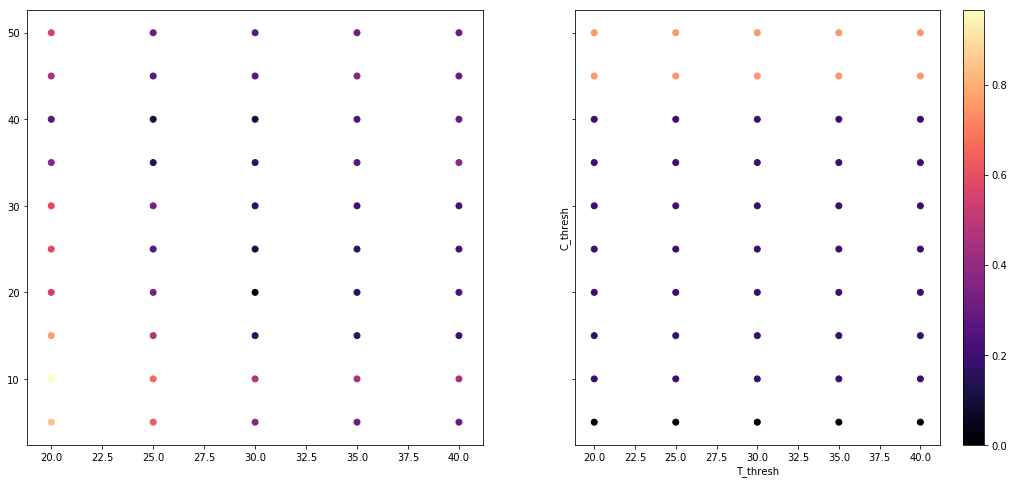

In [5]:
#broad observations array
trans_runs= parser_arr(glob('./output 2n4ptserr.txt')[0])

index = list(range(len(trans_runs[0])-1))
c_threshes = []
t_threshes = []
trans_matrices = []
diags = []
antidiags = []

for i in index:
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    if trans_threshes[1] <= 50 and trans_threshes[0] > 15:

        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        T_obb = N_transitions
        trans_matrices.append(T_obb)
        diags.append([T_obb[i, i] for i in range(len(T_obb))])
        antidiags.append([T_obb[i, len(T_obb)-i-1] for i in range(len(T_obb))])
    
diag_dists = [vector_dist(true_diag, diag) for diag in diags] / np.average(true_diag)
antidiag_dists = [vector_dist(true_antidiag, antidiag) for antidiag in antidiags] / np.average(true_antidiag)
    
print("range diag dists: ", min(diag_dists), max(diag_dists))
print("range antidiag diss: ", min(antidiag_dists), max(antidiag_dists))

fig, ax  = plt.subplots(ncols = 2, figsize = (18, 8), sharey=True, sharex=True)

norm = matplotlib.colors.Normalize(vmin=min(min(antidiag_dists),min(diag_dists)), vmax=max(max(antidiag_dists),max(diag_dists)))
scat = ax[0].scatter(t_threshes, c_threshes, c = diag_dists, cmap = 'magma', norm = norm)
cbar = plt.colorbar(scat)
ax[1].scatter(t_threshes, c_threshes, c = antidiag_dists, cmap = 'magma', norm = norm)

plt.xlabel("T_thresh")
plt.ylabel("C_thresh")

range diag dists:  0.0 0.7857142857142857
range antidiag diss:  0.0 0.6153846153846154


Text(0, 0.5, 'C_thresh')

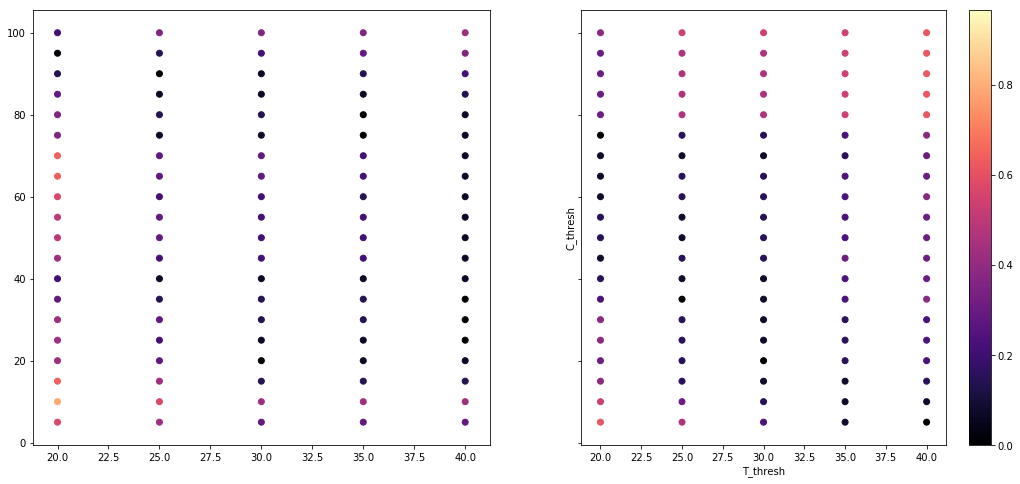

In [8]:
trans_runs= parser_arr(glob('./output 2n4ptserr.txt')[0])

index = list(range(len(trans_runs[0])-1))
c_threshes = []
t_threshes = []
trans_matrices = []
diags = []
antidiags = []

for i in index:
    N_transitions = trans_runs[0][i]
    trans_threshes = trans_runs[1][i]
    if trans_threshes[1] <= 100 and trans_threshes[0] >15:

        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        T_obb = N_transitions
        trans_matrices.append(T_obb)
        diags.append([T_obb[i, i] for i in range(len(T_obb))])
d1_dists = [abs(true_diag[0]-diag[0])/ true_diag[0] for diag in diags] 
d2_dists = [abs(true_diag[1]-diag[1])/ true_diag[1] for diag in diags] 
    
print("range diag dists: ", min(d1_dists), max(d1_dists))
print("range antidiag diss: ", min(d2_dists), max(d2_dists))

fig, ax  = plt.subplots(ncols = 2, figsize = (18, 8), sharey=True, sharex=True)

norm = matplotlib.colors.Normalize(vmin=min(min(antidiag_dists),min(diag_dists)), vmax=max(max(antidiag_dists),max(diag_dists)))
#norm2 = matplotlib.colors.Normalize(vmin= vmax=)
scat = ax[0].scatter(t_threshes, c_threshes, c = d1_dists, cmap = 'magma', norm = norm)
cbar = plt.colorbar(scat)
ax[1].scatter(t_threshes, c_threshes, c = d2_dists, cmap = 'magma', norm = norm)

plt.xlabel("T_thresh")
plt.ylabel("C_thresh")
